In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline 

In [152]:
df=pd.read_csv(r'C:/Users/pedro\Downloads/robotics procedure Processed data.csv')
df.head()

,Patient nr.,Date of birth,Initials,Sex,Treatment date,Type,Target,Complexity,Remark,Procedure,...,1e controle (2e scan),2e controle,Time procedure,Diagnosis,Histology,Accurate sample?,Complications,EPD DAP waarden Gy/cm2,EPD Fluoroscopy time,Fluoroscopy Time Format
0,9536,15/09/1941,JMB,M,14/07/2022,Biopsy,Lymphnode,3,Para Aortic L,15:30,...,15:41:00,NaN,3 scan 15:58,Histologisch naaldbiopt lymfeklier para-aortaa...,Positief,1.0,No,36,"3,15",03:09:00
1,21853,03/10/1950,GAMK,F,22/12/2021,Biopsy,Lung (LUL),2,NaN,13:17,...,-,NaN,NaN,"Longbiopt apex links: maligne, niet kleincelli...",Positief,1.0,"Small pneumothorax, no additional Tx","13,5","0,44",00:26:24
2,26567,17/05/1962,TEW,F,05/08/2021,Biopsy,Pancreas,3,NaN,11:24,...,NaN,NaN,NaN,Pancreasnaaldbiopt (pancreaskop dorsaal) zonde...,Negatief,1.0,No,"68,8","4,3",04:18:00
3,36999,03/06/1954,THJvE,M,31/03/2022,Biopsy,Lung (RLL),2,NaN,11:25,...,NaN,NaN,NaN,Longbiopt rechts: met metastasen van het bij p...,Positief,1.0,No,"12,8","1,34",01:20:24
4,37101,06/09/1950,MMWL,F,18/11/2020,Biopsy,Bone,2,Th11,12:25,...,12:45:00,-,NaN,Biopten wervel thoracale 11 met metastase aden...,Positief,1.0,No,10,"2,45",02:27:00


In [153]:
outcomedf=df[['Date of birth','Sex','Type','Target','Complexity','Remark','Complications']]
outcomedf.head()


,Date of birth,Sex,Type,Target,Complexity,Remark,Complications
0,15/09/1941,M,Biopsy,Lymphnode,3,Para Aortic L,No
1,03/10/1950,F,Biopsy,Lung (LUL),2,NaN,"Small pneumothorax, no additional Tx"
2,17/05/1962,F,Biopsy,Pancreas,3,NaN,No
3,03/06/1954,M,Biopsy,Lung (RLL),2,NaN,No
4,06/09/1950,F,Biopsy,Bone,2,Th11,No


In [154]:
outcomedf.describe()

,Complexity
count,159.000000
mean,2.295597
std,0.546027
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [155]:
biopsydf=df[df['Type'] == 'Biopsy'][['Type','Target','Complexity','Radiation Convert mSv','Procedure','Fluoroscopy Time Format']]
biopsydf.loc[:,'Radiation Convert mSv']=biopsydf['Radiation Convert mSv'].str.replace(',', '.').astype(float,errors='ignore')
biopsydf['Radiation Convert mSv'].fillna(biopsydf.groupby('Complexity')['Radiation Convert mSv'].transform('median'),inplace=True)
biopsydf.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_11936\3971092120.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  biopsydf.loc[:,'Radiation Convert mSv']=biopsydf['Radiation Convert mSv'].str.replace(',', '.').astype(float,errors='ignore')


,Type,Target,Complexity,Radiation Convert mSv,Procedure,Fluoroscopy Time Format
0,Biopsy,Lymphnode,3,10.469,15:30,03:09:00
1,Biopsy,Lung (LUL),2,3.921,13:17,00:26:24
2,Biopsy,Pancreas,3,7.925,11:24,04:18:00
3,Biopsy,Lung (RLL),2,4.752,11:25,01:20:24
4,Biopsy,Bone,2,3.062,12:25,02:27:00


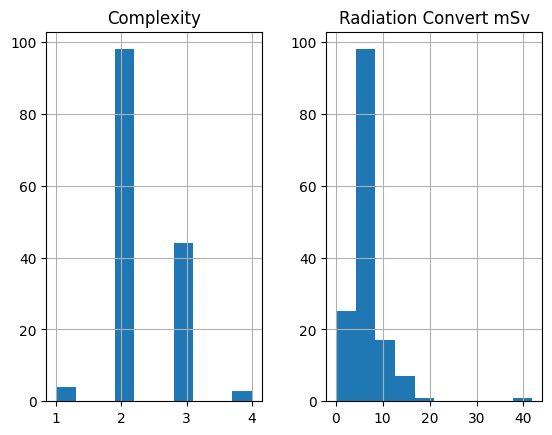

In [156]:
biopsydf.hist()
plt.show()

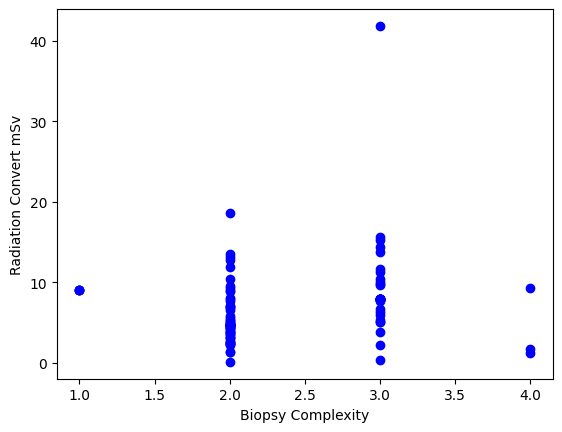

In [157]:
plt.scatter(biopsydf.Complexity,biopsydf['Radiation Convert mSv'],color='blue')
plt.xlabel("Biopsy Complexity")
plt.ylabel("Radiation Convert mSv")
plt.show()